# **2.5 Visual Applications of Machine Learning**

## **Proof-of-Concept for Automating Weather Data Digitisation Using Visual Machine Learning**
This project explores how visual machine learning techniques can be applied to automate the digitisation of historical handwritten weather records for ClimateWins. The goal is to create a proof-of-concept pipeline that converts handwritten numbers into a structured, machine-readable dataset. This approach starts with training a neural network on the MNIST dataset to recognise handwritten digits, then tests its performance on real-world, user-generated handwritten numbers. By establishing this workflow, ClimateWins can extend the methodology to classify weather-related images, ultimately supporting predictive modeling of atmospheric conditions from visual media.

## Table of Contents  
- [1. Import Libraries](#1-import-libraries)  
- [2. Set Random Seed](#2-set-random-seed)
- [3. Load MINST Data](#3-load-minst-data)
- [4. Explore Dataset](#4-explore-dataset)  
- [5. Visuallise Training Images](#5-visualise-training-images)
- [6. Preprocess Data](#6-preprocess-data)  
- [7. Define CNN Model](#7-define-cnn-model)  
- [8. Compile and Train Model](#8-compile-and-train-model)
- [9. Evaluate Model](#9-evaluate-model)
- [10. Load and Process One Custom Image](#12-load-and-process-one-custom-image)
- [11. Load and Process a Batch of Custom Images](#12-load-and-process-a-batch-of-custom-images)

---

## 1. Import Libraries

Here I load the Python packages needed for image preprocessing, deep learning, and evaluation:

- Core tools:
  - `pandas` and `numpy`: data handling and numerical computation.
  - `os`: for file and directory operations.
  - `operator`: for comparisons and sorting utilities.
- Visualisation:
  - `matplotlib.pyplot` and `seaborn`: for displaying training images, plotting accuracy/loss curves, and visualising results.
 - Machine learning utilities (scikit-learn):
  - `LabelEncoder`: for encoding categorical labels.
  - `confusion_matrix`: to evaluate prediction performance.
    - Deep learning (TensorFlow/Keras):
  - `Sequential`: for building models by stacking layers in order.
  - Layers:
    - `Conv2D`, `MaxPooling2D`: for extracting spatial features from images.
    - `Flatten`: converts feature maps into vectors for dense layers.
    - `Dense`: fully connected layers for classification.
    - `BatchNormalization`: stabilises training and speeds up convergence.
    - `Activation`: for applying nonlinear activation functions.
    - `Dropout`: for reducing overfitting by randomly deactivating neurons.
  - `to_categorical`: for one-hot encoding class labels.
  - `mnist` dataset: as a baseline training set.
- NumPy extras: `unique`, `reshape`, `argmax`, `asarray` for array transformations and decoding predictions.
- Image processing: `PIL.Image` for loading, resizing, and preprocessing custom images.

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

from numpy import unique, reshape, argmax, asarray
from PIL import Image

2025-09-01 21:26:33.864001: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


---

## 2. Set Random Seed
Ensures reproducibility: same random numbers → same model initialisation → consistent results.

In [6]:
# Set random seed
tf.random.set_seed(42)

---

## 3. Load MINST Data
I’m loading in the MNIST dataset, a standard benchmark in machine learning that contains 70,000 images of handwritten digits (0–9).
The data comes pre-split into a training set (60,000 images) and a test set (10,000 images).
Each image is a 28×28 grayscale pixel grid with values ranging from 0 (white) to 255 (black).
The corresponding labels (y) represent the digit shown in each image.
At this stage, I am also checking the shapes of the arrays to confirm that:
X_train and y_train hold the training images and labels
X_test and y_test hold the test images and labels
This ensures the dataset has been loaded correctly and is ready for preprocessing.

In [7]:
# Load MINST data
hand = mnist.load_data()

In [8]:
# Show the first element of the tuple (list with parentheses):
hand[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

---

## 4. Explore Dataset

Before preprocessing or modelling, I take a closer look at the MNIST dataset to build intuition about its structure and contents:
- Check raw pixel values: Each image is stored as a 28×28 NumPy array with values between 0–255, representing grayscale intensity.
- Inspect dataset shapes: Confirm the number of training images (60,000) and test images (10,000), along with their label arrays.
- Look at labels: Review the distribution of digits to see that all classes (0–9) are present.
- Visualise samples: Plot the first few images, both individually and in a grid of 25, to get a sense of the handwriting variability.

In [9]:
# Unpack dataset
(X_train, y_train), (X_test, y_test) = hand

In [10]:
# Configure NumPy print options
np.set_printoptions(edgeitems=3)           # Show 3 items at beginning and end when printing arrays
np.core.arrayprint._line_width = 180000    # Make lines very wide to avoid wrapping

In [11]:
# Display the pixel values (0–255) for the first training image
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

*Inspect the raw pixel values of the first image to help understand how images are stored numerically before passing them to a neural network.*

In [12]:
# Inspect dataset shapes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


*Meaning: 60k training images of size 28x28, and 60k labels*

*10k testing images of size 28x28, and 10k labels*

In [13]:
# Look at raw labels
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

*Displays the labels for training images, e.g. [5, 0, 4, ...]*

*Each number corresponds to the digit in the associated image*

---

## 5. Visualise Training Images

To better understand the dataset, I plot a selection of training images:
- Single image check: Display the very first training image (X_train[0]) to see the raw handwritten digit.
- Grid of examples: Plot the first 25 training images in a 5×5 grid, each with its corresponding label.

This visualisation step helps confirm that:
- The images are correctly loaded and formatted.
- Digits show natural handwriting variation, which the model must learn to generalise across.
- By examining real samples, I can verify that the dataset is ready for preprocessing and training.

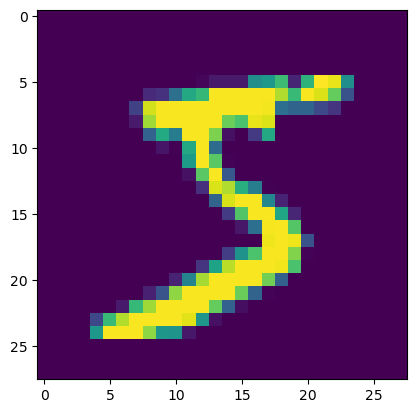

In [14]:
# Visualise the first training image 
plt.imshow(X_train[0])

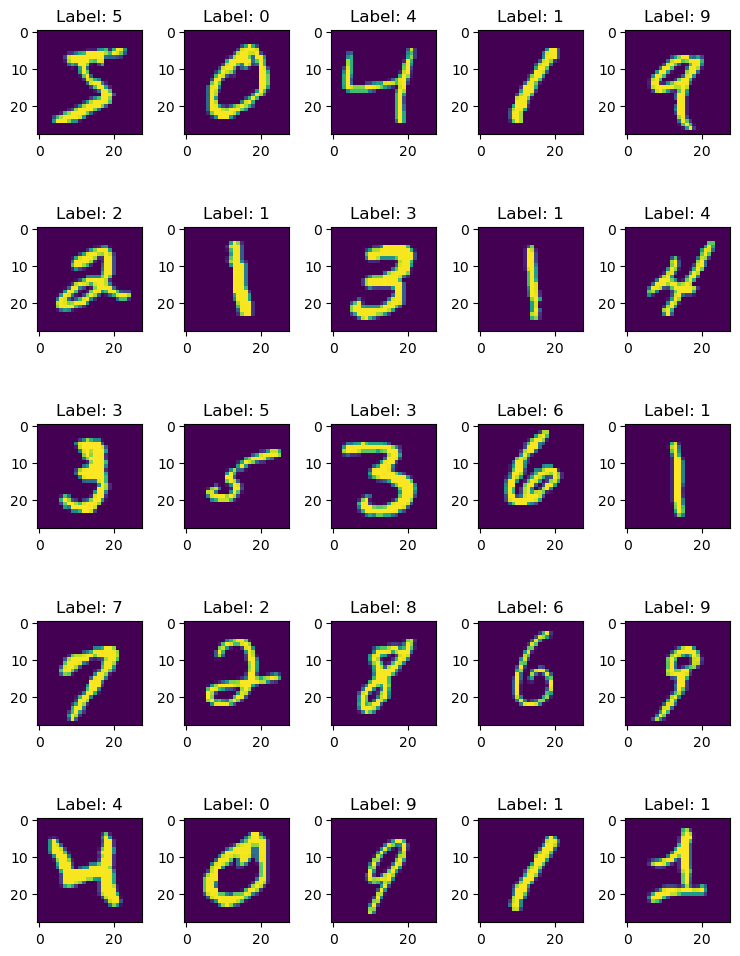

In [15]:
# Plot the first 25 training images with their labels
num = 25                  # Number of images to display 
images = X_train[:num]    # First 25 images
labels = y_train[:num]    # Their labels (digits)

num_row = 5               # Plot in 5 rows
num_col = 5               # and 5 columns (5x5 grid)
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])#, cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

---

## 6. Preprocess Data

Before feeding the data into a Convolutional Neural Network (CNN), the raw images and labels need to be prepared:
- Reshape images: Add a channel dimension so each image has shape (28, 28, 1) instead of (28, 28). This makes them compatible with CNNs, which expect 3D image inputs.
- Convert pixel values to floats: Change the data type from integers (0–255) to floating-point numbers.
- Normalise pixel values: Scale all values to the range [0,1] by dividing by 255. This speeds up learning and helps the model converge more reliably.
- One-hot encode labels: Transform digit labels (0–9) into binary vectors (e.g. 3 → [0,0,0,1,0,0,0,0,0,0]). This allows the model to output probabilities across all 10 classes.

Preprocessing ensures the input data is in the right shape, format, and scale for training an effective deep learning model.

In [16]:
# Preprocess image data
# CNNs expect data with a "channel" dimension (greyscale=1) channel)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [17]:
# Convert pixel values from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [18]:
# Normalise the pixels to range [0,1] (helps model train faster and better)
X_train /= 255
X_test /= 255

In [19]:
# Preprocess class labels (One-hot encoding)
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [20]:
# Display the first few one-hot encoded labels to inspect them
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

##### Each label is now a 10-element vector.

In [21]:
# Check first few one-hot labels
for label in range(10):
    one_hot = (Y_train[label]).astype(np.int32)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  1  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  3  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]
label:  5  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  6  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  7  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  8  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  9  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]


---

## 7. Define CNN Model

Now I will build the Convolutional Neural Network (CNN) architecture that will learn to recognise handwritten digits:
- Convolutional layers: Extract local patterns (like edges, curves, or strokes) from the input images.
- Max pooling: Downsamples feature maps, reducing complexity while keeping the most important features.
- Dropout: Randomly “turns off” neurons during training to reduce overfitting and improve generalisation.
- Flatten layer: Converts 2D feature maps into a 1D vector for the fully connected layers.
- Dense hidden layer: Learns higher-level representations of the extracted features.
- Output layer: Uses softmax activation to output probabilities for the 10 digit classes (0–9).

This architecture balances performance and simplicity—complex enough to capture patterns in the data, but light enough to train efficiently on the MNIST dataset.

In [22]:
# Model configuration
epochs = 30         # Model will see the enitre training dataset 30 times during training.
batch_size = 16     # Model looks at 16 images at a time before updating its weights.
n_hidden = 32       # This is just a placeholder for a hidden layer size (not used in this CNN, but common in fully connected networks).

# Define CNN model architecture
model = Sequential()   # Layers are stacked one after another like LEGO. 
 
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))

# Downsample feature maps
model.add(MaxPooling2D(pool_size=(2,2)))

# Dropout --> randomly turns off neurons (reduces overfitting)
model.add(Dropout(0.25))
 
# Flatten 2D feature maps into a 1D vector
model.add(Flatten())

# Fully connected hidden layer 
model.add(Dense(128, activation='relu'))

# Dropout again (prevent overfitting)
model.add(Dropout(0.5))

# Output layer: 10 neurons (digits 0-9), softmax gives probabilities 
model.add(Dense(10, activation='softmax'))
 
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


---

## 8. Compile and Train Model

With the model architecture defined, the next step is to compile and train it:

- Compile step:
  - Loss function: I use categorical crossentropy, which is standard for multi-class classification problems like digit recognition.
  - Optimizer: I chose Adam, an adaptive optimizer that adjusts learning rates automatically and works well for CNNs.
  - Metrics: I track accuracy to see how well the model predicts digits.

- Training step:
  - The model is trained on the MNIST training set using mini-batches (a subset of images at a time) to speed up learning.
  - Each pass through the training set is called an epoch. I train for 10 epochs, meaning the model sees all training images 10 times.
  - During training, the model updates its weights to minimise the loss and improve accuracy.

This step is where the model actually learns to map images of handwritten digits to their correct labels.

In [23]:
# Train the model on training data
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 95s 49ms/step - accuracy: 0.9365 - loss: 0.2076 
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.9745 - loss: 0.0871 
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 47ms/step - accuracy: 0.9805 - loss: 0.0658 
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.9831 - loss: 0.0549 
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.9849 - loss: 0.0476 
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.9874 - loss: 0.0388 
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.9881 - loss: 0.0367 
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 42ms/step - accuracy: 0.9898 - loss: 0.0322 
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.9900 - loss: 0.0310 
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.9905 - loss: 0.0282 


---

## 9. Evaluate the Model 

After training, I evaluate the model’s performance on the test dataset, which contains handwritten digits it has never seen before. This step checks how well the model generalises beyond the training data.

The evaluate function reports two key metrics:
- Loss: how far off the predictions are from the true labels.
- Accuracy: the proportion of correctly classified digits.

I also inspect the predicted probabilities for a few sample images, making sure the model outputs a probability distribution (summing to 1) across the 10 digit classes.

To get a more detailed picture of performance, I calculate a confusion matrix, which shows which digits the model classifies correctly and where it makes mistakes (e.g. confusing a “4” for a “9”).

This evaluation highlights both the strengths of the model and the areas where it struggles, giving insight into possible improvements.

In [24]:
# Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=2)

313/313 - 2s - 5ms/step - accuracy: 0.9913 - loss: 0.0305


In [25]:
# Make predictions
# Predict first 4 images in the test set
model.predict(X_test[:4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


array([[1.91671782e-14, 7.30772720e-10, 4.44365267e-10, 5.18162846e-10,
        4.05643444e-12, 3.38757820e-12, 3.49613428e-18, 1.00000000e+00,
        4.58913629e-10, 1.01722293e-08],
       [1.34953810e-12, 3.68625103e-10, 1.00000000e+00, 2.58488717e-12,
        1.24823751e-16, 4.18196100e-19, 4.19142238e-12, 2.51603480e-14,
        1.62474862e-12, 2.78390634e-19],
       [1.73804408e-11, 9.99999166e-01, 1.40887755e-08, 6.53818735e-11,
        2.04212029e-07, 8.34592697e-08, 1.10800054e-08, 4.43014073e-07,
        3.35207737e-08, 3.79183440e-09],
       [9.99978423e-01, 1.73353032e-09, 1.38824817e-07, 1.43428214e-10,
        1.69193086e-08, 3.05374428e-08, 2.09069003e-05, 2.90926994e-09,
        7.54144267e-08, 3.96925657e-07]], dtype=float32)

In [26]:
# Check that probabilities add up to 1
sumarray = np.sum(model.predict(X_test[:4]), axis=1)
sumarray

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([1.        , 1.        , 0.99999994, 1.        ], dtype=float32)

In [27]:
# Actual results for first 4 images in test set for comparison 
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [28]:
# Confusion matrix
test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step  
[[ 975    0    2    1    0    0    1    0    1    0]
 [   0 1131    1    2    0    1    0    0    0    0]
 [   1    1 1023    2    0    0    0    4    1    0]
 [   0    0    1 1006    0    2    0    0    1    0]
 [   0    0    1    0  970    0    0    0    2    9]
 [   0    0    0    6    0  885    1    0    0    0]
 [   4    2    0    1    1    5  943    0    2    0]
 [   0    2    5    0    0    0    0 1020    1    0]
 [   0    0    1    1    0    0    0    0  971    1]
 [   0    0    0    3    3    7    0    2    5  989]]


---

## 10. Load and Process One Custom Image 

To test the model in a real-world scenario, I use a handwritten digit. The goal is to check whether the trained CNN can correctly recognise digits outside the MNIST dataset.
Since MNIST digits are 28×28 pixels in grayscale, I resize the custom image to match this format.
I reshape it to fit the model’s expected input shape (1, 28, 28, 1) and normalise the pixel values.
Finally, I run the model’s predict function to see which digit it thinks it is.

In [29]:
# Load and process a custom image 
path = "/Users/yaseminmustafa/Desktop/CareerFoundry/Specialisation/Achievement 2/2.5/Support"
path

'/Users/yaseminmustafa/Desktop/CareerFoundry/Specialisation/Achievement 2/2.5/Support'

In [30]:
# Check folder
print(os.path.exists(path))  

True


In [31]:
# Load image file 
img = Image.open(os.path.join(path, 'handwritten-7.png'))
print(img.format)
print(img.size)
print(img.mode)

PNG
(1490, 1480)
P


In [32]:
# Resize to MNIST size (28x28)
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [33]:
# Convert to NumPy array
testimg = asarray(img2)
print(testimg.shape)

(28, 28)


In [34]:
# Reshape to match CNN input format
testimg = testimg.reshape(1, 28, 28, 1)

In [35]:
# Predict digit for custom image
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
7


---

## 11. Load and Process a Batch of Custom Images 

To extend the real-world test, I created my own dataset of handwritten digits (0–9) and included a letter for extra challenge. Each number was:
- Written naturally on paper, then photographed.
- Cropped into individual images so that each digit is centred in a white square.
- Converted into grayscale negative (white digit on black background), just like MNIST.

This process ensures that the images match the 28×28 pixel grayscale format expected by the trained CNN. I then loop through all the custom images, reshape them into (1, 28, 28, 1), and feed them into the model for prediction.

The output records which number I uploaded and which number the model predicted, so I can calculate accuracy. If I upload a letter, I check which digit the model mistakes it for.

In [59]:
# Load and process batch of custom images 
# Folder containing handwritten digits 0–9 and a letter
path1 = "/Users/yaseminmustafa/Desktop/CareerFoundry/Specialisation/Achievement 2/2.5/Numbers_Grey_Scale"
path1

'/Users/yaseminmustafa/Desktop/CareerFoundry/Specialisation/Achievement 2/2.5/Numbers_Grey_Scale'

In [60]:
# List of image filenames 
files = [
    "Grey_0.png", "Grey_1.png", "Grey_2.png", 
    "Grey_3.png", "Grey_4.png", "Grey_5.png",
    "Grey_6.png", "Grey_7.png", "Grey_8.png", 
    "Grey_9.png", "Grey_Y.png"
]

In [61]:
# Loop through all files
results = {}
for fname in files:
    img = Image.open(os.path.join(path1, fname)).convert('L')  # grayscale
    img = img.resize((28, 28))  # resize to MNIST size
    testimg = asarray(img)      # convert to NumPy array
    testimg = 255 - testimg     # invert colors (white digit on black)
    testimg = testimg.reshape(1, 28, 28, 1).astype("float32") / 255.0  # reshape + normalise

     # Predict digit
    predict_value = model.predict(testimg)
    digit = argmax(predict_value)
    
    # Save in dictionary
    results[fname] = digit

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [62]:
# Show results
for fname, pred in results.items():
    print(f"File: {fname} → Predicted: {pred}")

# Determine what the model predicted for the letter
letter_file = "Grey_Y.png"
predicted_for_letter = results[letter_file]
print(f"The model predicted the letter ({letter_file}) as digit: {predicted_for_letter}")

File: Grey_0.png → Predicted: 7
File: Grey_1.png → Predicted: 0
File: Grey_2.png → Predicted: 0
File: Grey_3.png → Predicted: 8
File: Grey_4.png → Predicted: 5
File: Grey_5.png → Predicted: 5
File: Grey_6.png → Predicted: 5
File: Grey_7.png → Predicted: 0
File: Grey_8.png → Predicted: 5
File: Grey_9.png → Predicted: 8
File: Grey_Y.png → Predicted: 0
The model predicted the letter (Grey_Y.png) as digit: 0


In [63]:
# Automating accuracy calculation 
# Make a mapping of expected labels
true_labels = {
    "Grey_1.png": 1, 
    "Grey_2.png": 2, 
    "Grey_3.png": 3, 
    "Grey_4.png": 4, 
    "Grey_5.png": 5, 
    "Grey_6.png": 6,
    "Grey_7.png": 7, 
    "Grey_8.png": 8, 
    "Grey_9.png": 9, 
    "Grey_Y.png": "Y"
}

results = {}
correct = 0

for fname in files:
    img = Image.open(os.path.join(path1, fname)).convert('L')
    img = img.resize((28, 28))
    testimg = asarray(img)
    testimg = 255 - testimg   # invert if needed
    testimg = testimg.reshape(1, 28, 28, 1).astype("float32") / 255.0

    # Predict
    predict_value = model.predict(testimg)
    digit = argmax(predict_value)

    results[fname] = digit

    # Compare if label exists in mapping and is numeric
    if fname in true_labels and isinstance(true_labels[fname], int):
        if digit == true_labels[fname]:
            correct += 1

# Calculate accuracy
accuracy = correct / sum(isinstance(v, int) for v in true_labels.values())
print("Predictions:", results)
print(f"Accuracy: {accuracy:.2%}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predictions: {'Grey_0.png': 7, 'Grey_1.png': 0, 'Grey_2.png': 0, 'Grey_3.png': 8, 'Grey_4.png': 5, 'Grey_5.png': 5, 'Grey_6.png': 5, 'Grey_7.png': 0, 'Grey_8.png': 5, 'Grey_9.png': 8, 'Grey_Y.png': 0}
Accuracy: 11.11%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


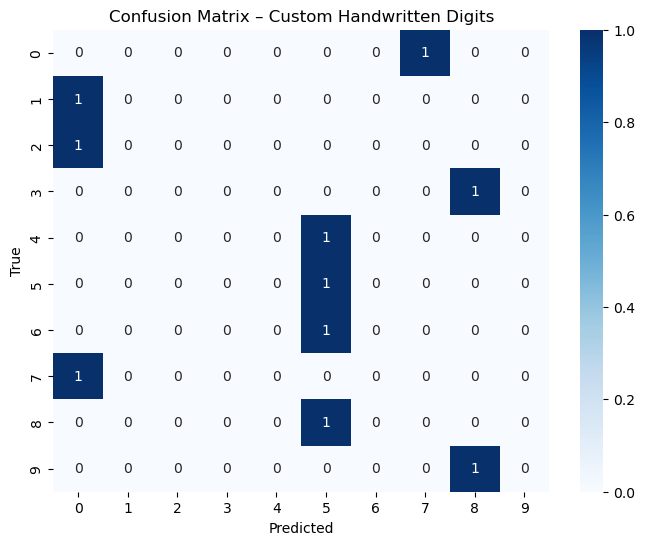

In [65]:
# Store true and predicted labels
y_true = []
y_pred = []

for fname in files:
    img = Image.open(os.path.join(path1, fname)).convert('L')
    img = img.resize((28, 28))
    testimg = asarray(img)

    # Invert if needed (black on white paper case)
    testimg = 255 - testimg  

    testimg = testimg.reshape(1, 28, 28, 1).astype("float32") / 255.0

    # Model prediction
    predict_value = model.predict(testimg)
    digit = argmax(predict_value)

    # Append true + predicted (skip letters since they’re not numeric)
    if fname.startswith("Grey_") and fname[5:-4].isdigit():  # grabs the number after 'Grey_'
        y_true.append(int(fname[5:-4]))
        y_pred.append(digit)
        
# Build confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – Custom Handwritten Digits")
plt.show()